In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
import cv2
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


In [5]:
path0='C:/Users/Asus/Desktop/archive/SOCOFing/Real/100__M_Right_index_finger.BMP'
path1='C:/Users/Asus/Desktop/archive/SOCOFing/Real/125__M_Right_index_finger.BMP'

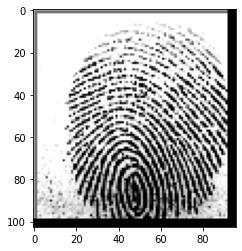

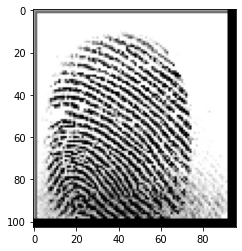

In [6]:
image=cv2.imread(path0)
plt.imshow(cv2.cvtColor(image,cv2.IMREAD_COLOR))                    ## Let's see some images from data set. 
plt.show()
image2=cv2.imread(path1)
plt.imshow(cv2.cvtColor(image2,cv2.IMREAD_COLOR))                 
plt.show()


In [11]:
print(image.shape)   ## what is the shape of each image. 

(103, 96, 3)


In [12]:
print(image)       ## What does it look like. 

[[[160 160 160]
  [160 160 160]
  [160 160 160]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[160 160 160]
  [105 105 105]
  [105 105 105]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[160 160 160]
  [105 105 105]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [13]:
def labeling_data(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))  ## We fetch only one data   
                                                                 ##1__M_Left_index_finger_CR sample name of data
    index, features = filename.split('__')      ##Here is '__' delimeter is used to name index and feature we split that and 
    
    
    gender, leftright, finger, val1, val2 = features.split('_')   ## for extracting the other values we can use the delimeter
                                                                   ##  we only need the gender data. 

    
    gender = 0 if gender == 'M' else 1              #Gender is encoded as M = 0 , F = 1
    

        
    return np.array([index, gender], dtype=np.uint16)           #return the  gender data with index.

In [17]:
img_size = 96

def getdata(path):
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  ##img array is read, reshaped then added to the data array.
            img_resize = cv2.resize(img_array, (img_size, img_size))               ##resize it by 96*96
            label = labeling_data(os.path.join(path, img))                   ##extract the labels 
            data.append([label[1], img_resize ])    
        except Exception as e:
            pass
    data
    return data

In [18]:

data_path = "C:/Users/Asus/Desktop/archive/SOCOFing/Altered/Altered_Easy-1"

Easy_data = getdata(data_path)           ### Load the data from dataset 

data = Easy_data
del Easy_data                       ## We can delete it after using

In [19]:
X, y = [], []

for label, feature in data:     ## creating the labels and feature set for the algorithm
    X.append(feature)           ## we are appending our label and features with the extracted data information. 
    y.append(label)
                                            
      

X = np.array(X).reshape(-1, img_size, img_size)  ## Here for processing data i converted into one dimensional array s
X = X / 255.0                                    ## And normalized it. 

y = np.array(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) ## split the data 

In [21]:
X_train = X_train.reshape((-1, 96*96))
X_test = X_test.reshape((-1, 96*96))      ##turn every image to a single value for the neural network.

0.9331843050792095


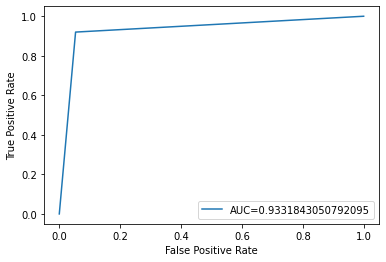

In [22]:
clf = MLPClassifier(solver='adam', activation='relu',hidden_layer_sizes=(64,64))
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)

print(roc_auc_score(y_test,clf_predict))

false, true, _ = metrics.roc_curve(y_test, clf_predict)             ## For the mlp classifier here are the model fit and roc curve calculations.
auc = metrics.roc_auc_score(y_test, clf_predict)

plt.plot(false,true,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()



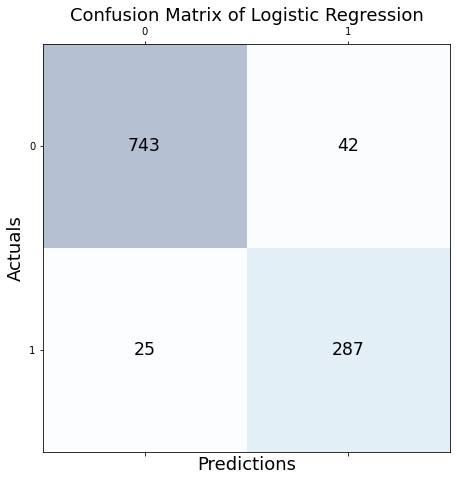

In [23]:
conf_matrix = confusion_matrix(y_test, clf_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):                         ##Print confusion matrix.
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

Logistic Regression 

0.9459231585823942


C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


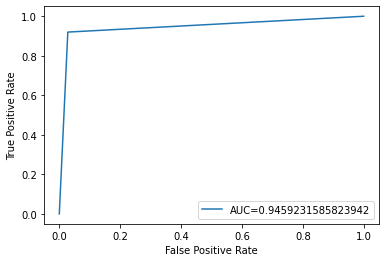

In [24]:

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
logistic_predict = log_model.predict(X_test)

print(roc_auc_score(y_test,logistic_predict))

fpr, tpr, _ = metrics.roc_curve(y_test, logistic_predict)           ##calculations for the logistic Regression
auc = metrics.roc_auc_score(y_test, logistic_predict)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


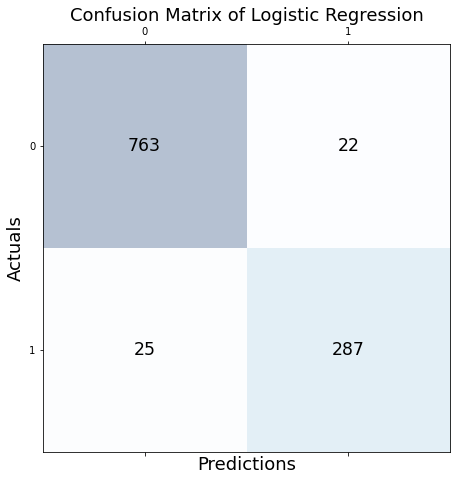

In [25]:
conf_matrix = confusion_matrix(y_test, logistic_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')    ## Confusion matrix for logistic regression
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

Gaussian Naive Bayes;

Accuracy score of Naive Bayes model is:0.5165400947248081


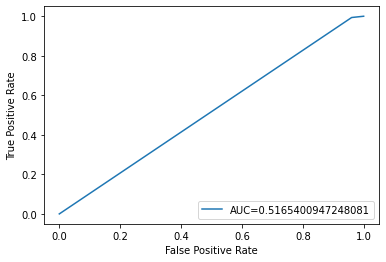

In [26]:

model_naive = GaussianNB()
model_naive.fit(X_train,y_train)
gauss_predict = model_naive.fit(X_train,y_train).predict(X_test)

print('Accuracy score of Naive Bayes model is:{}' .format(roc_auc_score(y_test,gauss_predict)))

fpr, tpr, _ = metrics.roc_curve(y_test, gauss_predict)
auc = metrics.roc_auc_score(y_test, gauss_predict)                  

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()



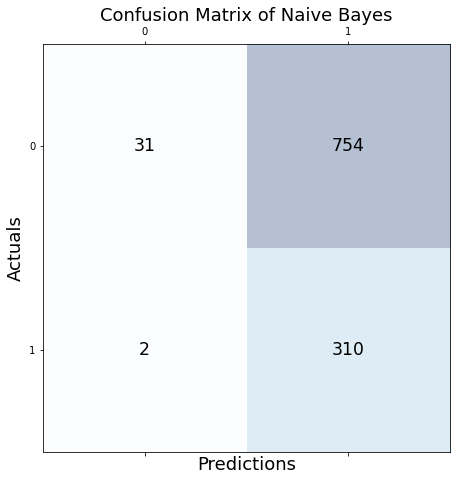

In [27]:
conf_matrix = confusion_matrix(y_test, gauss_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Naive Bayes', fontsize=18)
plt.show()

KNeighborsClassifier Approach;

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test) 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.731084776663628


In [29]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

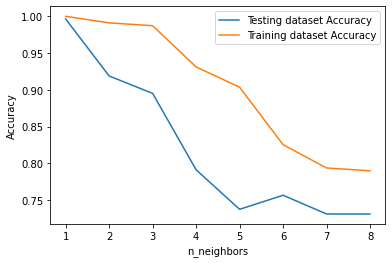

In [66]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)                        ##observing accuracy of KNN over n_neighbors
 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Accuracy score of K Nearest Neighbor model is:0.6373244324677446


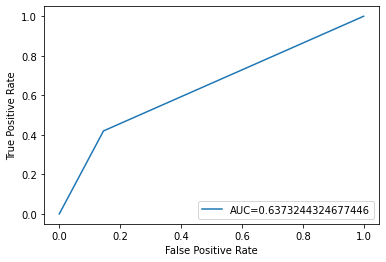

In [30]:

print('Accuracy score of K Nearest Neighbor model is:{}' .format(roc_auc_score(y_test,knn_predict)))

false, true, _ = metrics.roc_curve(y_test, knn_predict)
auc = metrics.roc_auc_score(y_test, knn_predict)

plt.plot(false,true,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

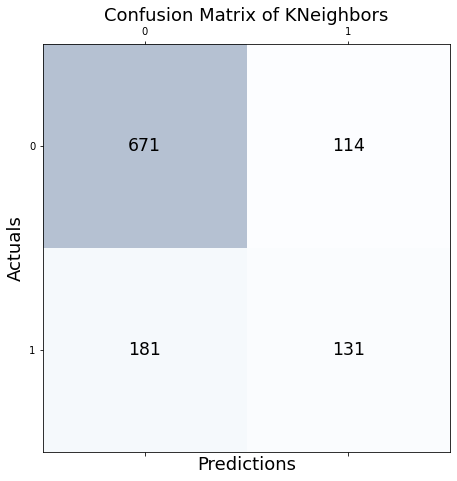

In [31]:
conf_matrix = confusion_matrix(y_test, knn_predict)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNeighbors', fontsize=18)
plt.show()